# Whole Data Analysis

Simple distributions over time, people and so on...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import dask
import dask_mongo
import dask.dataframe as dd

from langcodes import Language

In [2]:
sns.set_theme(style='darkgrid')

## Loading and preparing data from MongoDB

In [28]:
%%time

b = dask_mongo.read_mongo(
    database='ed23db',
    collection='tweets',
    chunksize=200_000,
    connection_kwargs={
        'host': 'localhost',
        'port': 27017
    }
)

CPU times: user 259 ms, sys: 77.7 ms, total: 336 ms
Wall time: 13min 30s


In [29]:
df = b.to_dataframe()

In [30]:
df.columns

Index(['_id', 'userid', 'tweetid', 'tweetcreatedts', 'retweetcount', 'text',
       'hashtags', 'language', 'coordinates', 'favorite_count', 'is_retweet',
       'original_tweet_id', 'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')

In [31]:
df.dtypes

_id                        object
userid                     object
tweetid                    object
tweetcreatedts             object
retweetcount               object
text                       object
hashtags                   object
language                   object
coordinates                object
favorite_count             object
is_retweet                 object
original_tweet_id          object
original_tweet_userid      object
original_tweet_username    object
in_reply_to_status_id      object
in_reply_to_user_id        object
in_reply_to_screen_name    object
is_quote_status            object
quoted_status_id           object
quoted_status_userid       object
quoted_status_username     object
extractedts                object
dtype: object

In [32]:
# df = df.astype({'lang': 'category'})
# df['lang'].unique().compute()

In [33]:
# df.dtypes

In [34]:
# %%time

# df.describe().compute()

In [35]:
%%time

df.head(10)

CPU times: user 2.55 s, sys: 486 ms, total: 3.03 s
Wall time: 23.4 s


,_id,userid,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,642abd59e4c8d692d061b240,1237027988287471618,1579622809680035841,2022-10-11 00:00:00,11,Después de profanar la Mezquita de Ibrahim en ...,"[{'text': 'palestina', 'indices': [142, 152]},...",es,,13,...,0,,0,0,,False,0,0,,2022-10-11 09:57:02.393489
1,642abd59e4c8d692d061b242,1407899290790473732,1579622809847808000,2022-10-11 00:00:00,1,La voix de son maître 🇺🇸\nAlors que l'#Ukraine...,"[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",fr,,0,...,0,,0,0,,False,0,0,,2022-10-11 02:31:18.024129
2,642abd59e4c8d692d061b244,6509832,1579622810560786432,2022-10-11 00:00:00,1,#WarInUkraine | Putin Confirms Russia Attacked...,"[{'text': 'WarInUkraine', 'indices': [0, 13]},...",en,,5,...,0,,0,0,,False,0,0,,2022-10-11 04:37:34.820908
3,642abd59e4c8d692d061b246,1570222426570608641,1579622810619723776,2022-10-11 00:00:00,1,We made a set of heart-shaped pinatas with the...,"[{'text': 'WeStandWithUkraine', 'indices': [16...",en,,4,...,0,,0,0,,False,0,0,,2022-10-11 05:41:38.847525
4,642abd59e4c8d692d061b248,20918680,1579622810774749184,2022-10-11 00:00:00,0,Have you listened to @AmandaMcBroom1 &amp; @Mi...,"[{'text': 'GodofWar', 'indices': [80, 89]}, {'...",en,,0,...,0,,0,0,,False,0,0,,2022-10-11 02:31:18.004654
5,642abd59e4c8d692d061b24a,216893584,1579622812410470400,2022-10-11 00:00:01,0,#LasMasImportantes | 🚨🇺🇦🇷🇺 ¿Hasta cuándo? Rusi...,"[{'text': 'LasMasImportantes', 'indices': [0, ...",es,,2,...,0,,0,0,,False,0,0,,2022-10-11 09:57:02.381823
6,642abd59e4c8d692d061b24c,62089976,1579622812582817793,2022-10-11 00:00:01,2,Oby ruskie kacapy szczezły w cierpieniach 😡 #P...,"[{'text': 'PutinBarbarian', 'indices': [44, 59...",pl,,3,...,0,,0,0,,False,0,0,,2022-10-11 05:56:56.934858
7,642abd59e4c8d692d061b24e,209520717,1579622814260264963,2022-10-11 00:00:01,0,"✅ Ante advertencia de #Putin, embajada de #Méx...","[{'text': 'Putin', 'indices': [22, 28]}, {'tex...",es,,1,...,0,,0,0,,False,0,0,,2022-10-11 04:47:26.830542
8,642abd59e4c8d692d061b250,1573729011364241409,1579622814847475712,2022-10-11 00:00:01,0,very interesting cat #CuteCats #CatsOfTwitter ...,"[{'text': 'CuteCats', 'indices': [21, 30]}, {'...",en,,1,...,0,,0,0,,False,0,0,,2022-10-11 09:57:02.370092
9,642abd59e4c8d692d061b252,916681683134447617,1579622817427263488,2022-10-11 00:00:02,0,ETH may consolidate as Merge excitement wears ...,"[{'text': 'ELON', 'indices': [63, 68]}, {'text...",en,,0,...,0,,0,0,,False,0,0,,2022-10-11 02:31:17.994932


In [36]:
%%time

# turning create_at to datetime
# df['created_at'] = dd.to_datetime(df['tweetcreatedts'], utc=True, infer_datetime_format=True, errors='coerce')

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


In [37]:
df.dtypes

_id                        object
userid                     object
tweetid                    object
tweetcreatedts             object
retweetcount               object
text                       object
hashtags                   object
language                   object
coordinates                object
favorite_count             object
is_retweet                 object
original_tweet_id          object
original_tweet_userid      object
original_tweet_username    object
in_reply_to_status_id      object
in_reply_to_user_id        object
in_reply_to_screen_name    object
is_quote_status            object
quoted_status_id           object
quoted_status_userid       object
quoted_status_username     object
extractedts                object
dtype: object

In [38]:
# setting index for datetime
# df = df.set_index('created_at')

## Language Usage

In [39]:
%%time

lang_count = df['language'].value_counts().compute()

CPU times: user 33min 32s, sys: 1min 40s, total: 35min 13s
Wall time: 39min 14s


In [40]:
lang_count

language
en     83749092
und     7302980
de      7272030
fr      6858800
it      5948508
         ...   
sd          720
dv          252
ug          170
lo           56
bo           14
Name: count, Length: 66, dtype: int64

In [46]:
lang_count_trunc = lang_count[lang_count > 200_000]

In [47]:
def get_full_language_name(twitter_code: str):
    twitter_special_codes = {
        'qam': 'mentions only',
        'qct': 'cashtags only',
        'qht': 'hashtags only',
        'qme': 'media links only',
        'qst': 'very short text',
        'zxx': 'media or Twitter Card only'
    }
    return twitter_special_codes.get(twitter_code, Language.get(twitter_code).display_name())

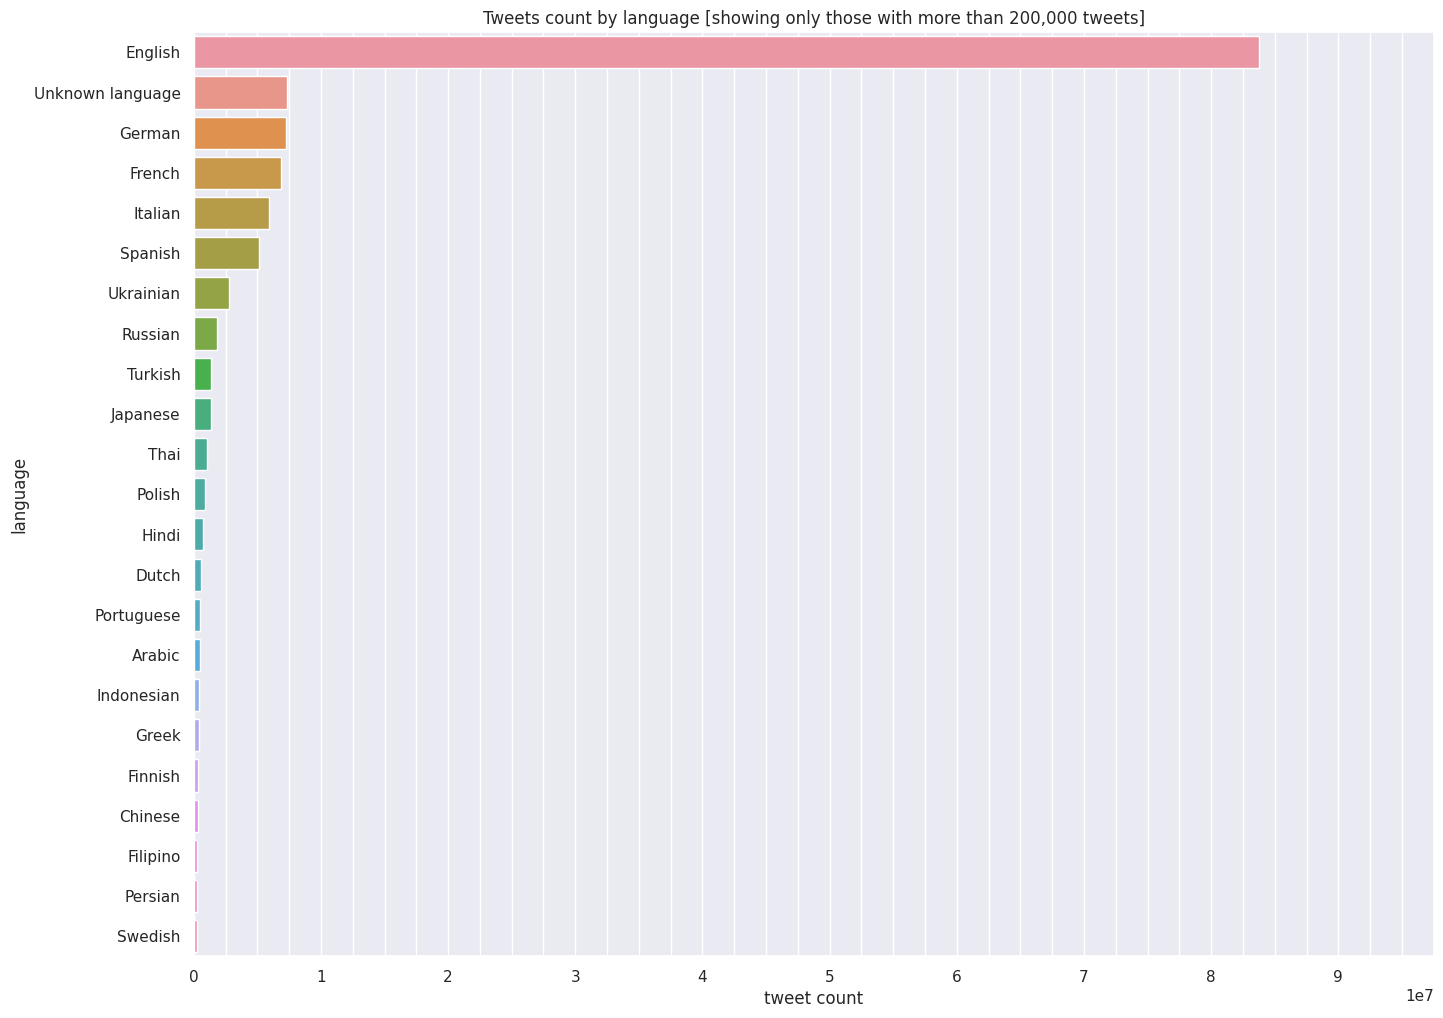

In [50]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.barplot(y=np.arange(len(lang_count_trunc)), x=lang_count_trunc, orient='h', ax=ax)

ax.set_title('Tweets count by language [showing only those with more than 200,000 tweets]')

language_full_names = [get_full_language_name(code) for code in lang_count_trunc.index]
ax.set_yticks(np.arange(len(lang_count_trunc)), labels=language_full_names)
ax.set_xticks(np.arange(0, 100_000_000, 10_000_000), minor=False)
ax.set_xticks(np.arange(0, 100_000_000, 2_500_000), minor=True)

ax.set_xlabel('tweet count')
ax.set_ylabel('language')

ax.grid(visible=True, axis='x', which='both')
plt.show()

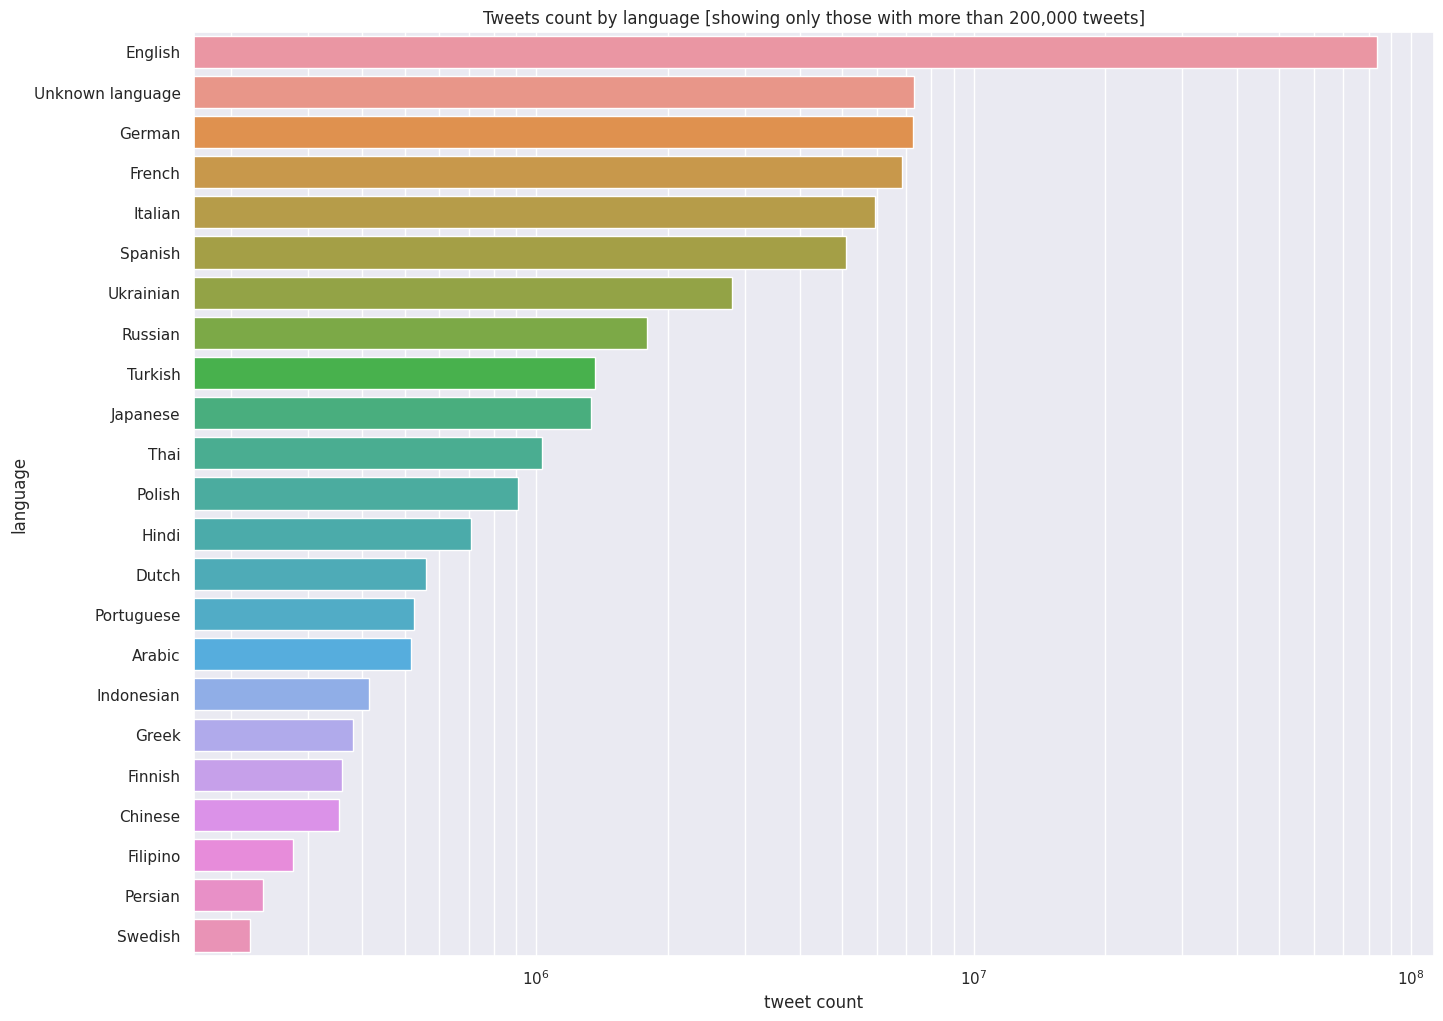

In [51]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.barplot(y=np.arange(len(lang_count_trunc)), x=lang_count_trunc, orient='h', ax=ax)

ax.set_title('Tweets count by language [showing only those with more than 200,000 tweets]')

language_full_names = [get_full_language_name(code) for code in lang_count_trunc.index]
ax.set_yticks(np.arange(len(lang_count_trunc)), labels=language_full_names)
ax.set_xticks(np.arange(0, 100_000_000, 10_000_000), minor=False)
ax.set_xticks(np.arange(0, 100_000_000, 2_500_000), minor=True)

ax.set_xlabel('tweet count')
ax.set_ylabel('language')
ax.set_xscale('log')

ax.grid(visible=True, axis='x', which='both')
plt.show()

Calculating takes too much time. Better to be tested on small chunks of data, then running Jupyter Notebook using `tmux` and leaving the calculations for the night.